In [1]:
! pip install numpy

In [2]:
! pip install pandas

In [3]:
! pip install matplotlib

In [4]:
! pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
data = pd.read_csv('data/nycpropertysales.csv')

In [7]:
features = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']
target = ['SALE PRICE']

data = data.dropna()

X = data[features]
Y = data[target]

In [8]:

X.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
62,1,ALPHABET CITY,11A CONDO-RENTALS,2,385,1102,RR,254 EAST 2ND STREET,RES,10009,47,0,47,2325.0,36472.0,2005,2,RR
64,1,ALPHABET CITY,11A CONDO-RENTALS,2,397,1301,RR,250 EAST HOUSTON STREET,UNIT1,10002,132,0,132,33650.0,1680.0,1989,2,RR
65,1,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,1B,10009,1,0,1,2325.0,1680.0,0,2,R2
66,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,3A,10009,1,0,1,2325.0,1680.0,1920,2,R4
67,1,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,3B,10009,1,0,1,2325.0,1680.0,1920,2,R4


In [9]:
print(Y)

       SALE PRICE
62     28000000.0
64     52625000.0
65       620000.0
66       762669.0
67       772851.0
...           ...
69882    420810.0
69883    410670.0
69884    420810.0
69885    430950.0
69892      5000.0

[15496 rows x 1 columns]


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label = LabelEncoder()

encodelist = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER','BUILDING CLASS AT TIME OF SALE']

for i in encodelist:
    X[i] = label.fit_transform(X[i])

C:\Users\user\AppData\Local\Temp\ipykernel_4464\4122170507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = label.fit_transform(X[i])
C:\Users\user\AppData\Local\Temp\ipykernel_4464\4122170507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = label.fit_transform(X[i])
C:\Users\user\AppData\Local\Temp\ipykernel_4464\4122170507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [11]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [24]:
xtrain, xvalidate, ytrain,yvalidate = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
print(xtrain)

[[  480.23617944  -781.08911266]
 [  481.71341007  -391.22309204]
 [  495.77260106 -1839.07296224]
 ...
 [  465.94090836 -1130.67900033]
 [  509.88599173 -2063.6384568 ]
 [28179.35337393  3606.29295317]]


In [26]:
# xtrain.drop(xtrain.iloc[:0])
print(xtrain)

[[  480.23617944  -781.08911266]
 [  481.71341007  -391.22309204]
 [  495.77260106 -1839.07296224]
 ...
 [  465.94090836 -1130.67900033]
 [  509.88599173 -2063.6384568 ]
 [28179.35337393  3606.29295317]]


In [34]:
scaler = StandardScaler()

In [51]:
xtrain_reshape = scaler.fit_transform(xtrain)
xvalidate_reshape = scaler.transform(xvalidate)

display(xvalidate_reshape)
print(xtrain_reshape.shape)
print(ytrain.shape)
xvalidate_reshape.shape

array([[ 0.10432377, -0.22776741],
       [ 0.10329807, -0.37511493],
       [-0.36089521,  1.11166098],
       ...,
       [ 0.08416529,  1.27904405],
       [-0.34102733, -0.5064087 ],
       [ 0.10724195, -0.36554907]])

(12396, 2)
(12396, 1)


(3100, 2)

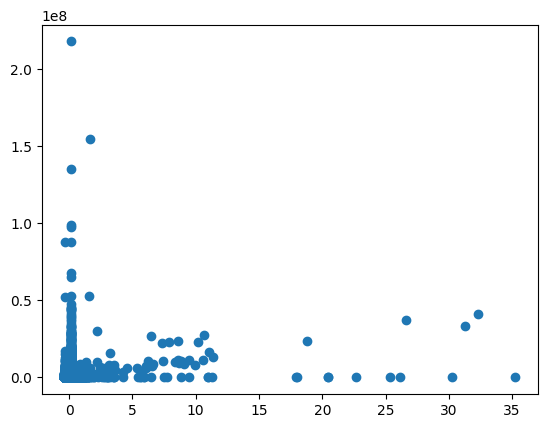

In [52]:
plt.scatter(xtrain_reshape[:, 0], ytrain)

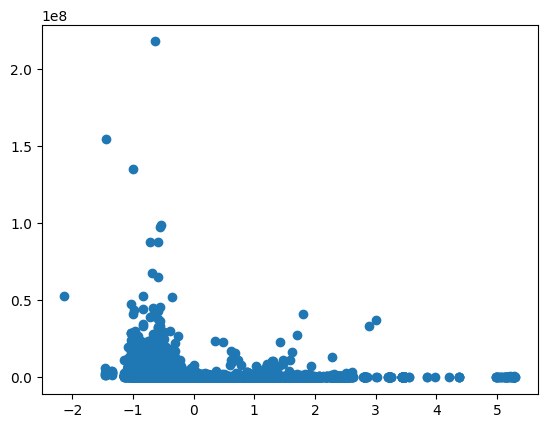

In [53]:
plt.scatter(xtrain_reshape[:, 1], ytrain)

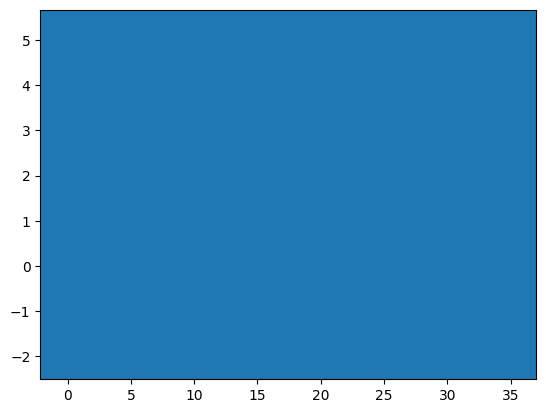

In [55]:
plt.scatter(xtrain_reshape[:, 0], xtrain_reshape[:, 1], ytrain)

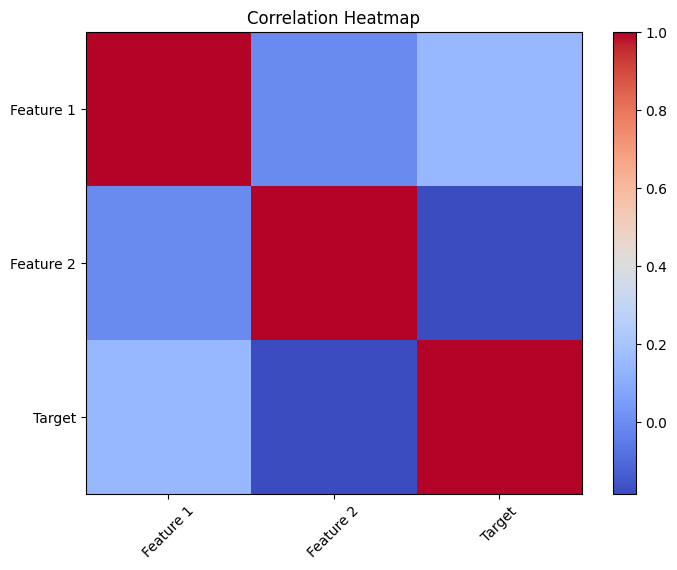

In [57]:
data = np.hstack((xtrain_reshape, ytrain))  # Combine features and target
columns = ['Feature 1', 'Feature 2', 'Target']
df = pd.DataFrame(data, columns=columns)

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

plt.colorbar()

# Add labels and title
plt.xticks(range(len(columns)), columns, rotation=45)
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Heatmap')

# Show plot
plt.show()


In [36]:
model = LinearRegression()

model.fit(xtrain_reshape, ytrain)

LinearRegression()

In [37]:
prediction = model.predict(xvalidate_reshape)

In [38]:
print(prediction)

[[1951009.40012413]
 [2071593.52729144]
 [ 548630.43269432]
 ...
 [ 698109.08614888]
 [1892892.88666694]
 [2066267.29305159]]


In [39]:
print(mean_squared_error(yvalidate, prediction))

17011225396342.648


In [40]:
print(r2_score(yvalidate, prediction))

0.05725445809703944
